# Import the Relevant Libraries

In [1]:
# for data manipulation and mathematical computation
import numpy as np
import pandas as pd
# for plotting graph
import matplotlib.pyplot as plt
%matplotlib inline
# for data visualization
import seaborn as sns
sns.set()
# for ignoring any warnings
import warnings
warnings.filterwarnings('ignore')

# Reading data 

In [2]:
# Loading the data
train = pd.read_csv('train_LZdllcl.csv')
test = pd.read_csv('test_2umaH9m.csv')
submission = pd.read_csv('sample_submission_M0L0uXE.csv')


In [3]:
train_1 = train.copy()
test_1 = test.copy()

# Understanding the Data

In [4]:
# Looking the data
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [5]:
# looking the features which is contained in the dataset
train.columns


Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [6]:
test.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score'],
      dtype='object')

We have similar features in train and test dataset except 'is_promoted' that we have to be predicted.

In [7]:
# Displaying information like datatype,memory usage etc.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In our dataset mix of datatype present like int, float and object etc. that means we have categorical and numerical variables and we have to adopt different method to deal with them.


In [8]:
# look the shape of the variable
train.shape

(54808, 14)

In [9]:
test.shape

(23490, 13)

# Univariate Analysis

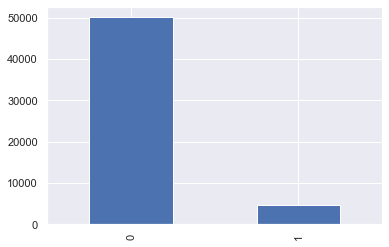

In [10]:
# For categorical variable we will use frequency table or bar plot
# For numerical variable we will use probability density plot to look the distribution of the data
train['is_promoted'].value_counts().plot(kind='bar')

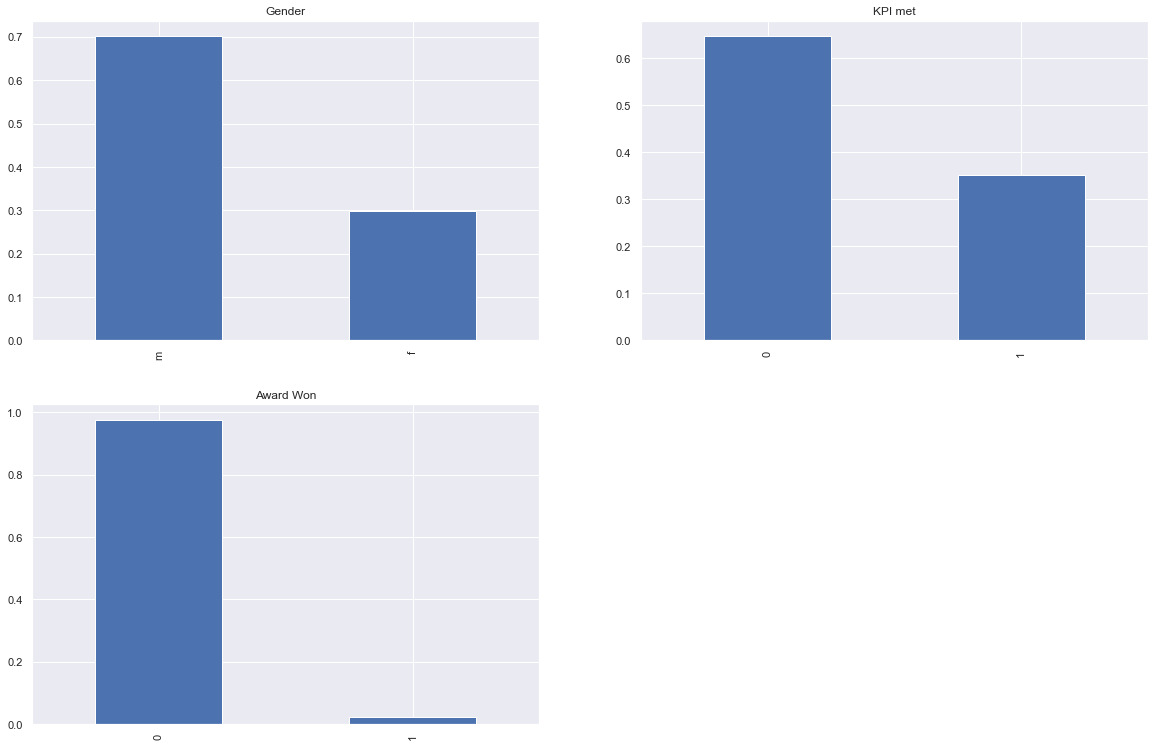

In [11]:
# Visualize categorical features
plt.figure(1)
plt.subplot(321)
train['gender'].value_counts(normalize=True).plot(kind='bar',figsize=(20,20),title='Gender')
plt.subplot(322)
train['KPIs_met >80%'].value_counts(normalize=True).plot(kind='bar',title='KPI met')
plt.subplot(323)
train['awards_won?'].value_counts(normalize=True).plot(kind='bar',title='Award Won')


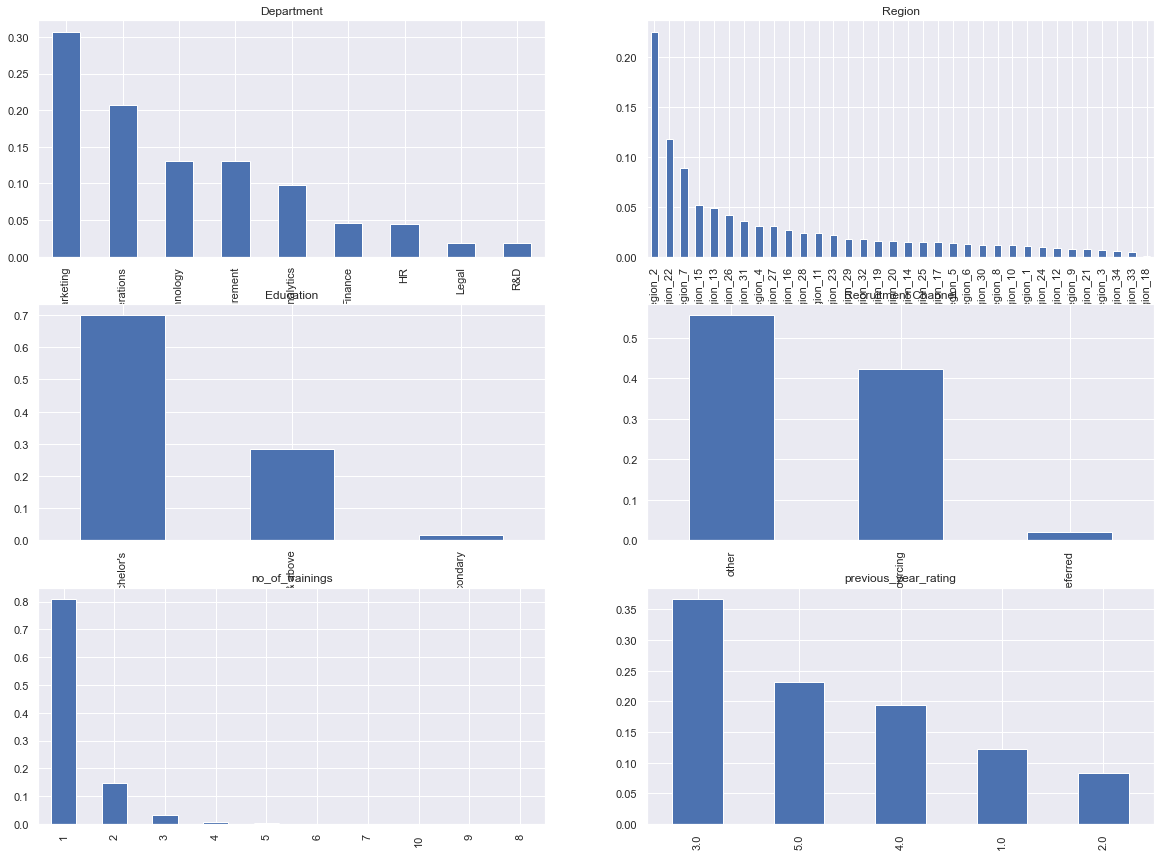

In [12]:
# Visualize ordinal features
plt.figure(1)
plt.subplot(421)
train['department'].value_counts(normalize=True).plot(kind='bar',figsize=(20,20),title='Department')
plt.subplot(422)
train['region'].value_counts(normalize=True).plot(kind='bar',title='Region')
plt.subplot(423)
train['education'].value_counts(normalize=True).plot(kind='bar',title='Education')
plt.subplot(424)
train['recruitment_channel'].value_counts(normalize=True).plot(kind='bar',title='Recruitment Channel')
plt.subplot(425)
train['no_of_trainings'].value_counts(normalize=True).plot(kind='bar',title='no_of_trainings')
plt.subplot(426)
train['previous_year_rating'].value_counts(normalize=True).plot(kind='bar',title='previous_year_rating')


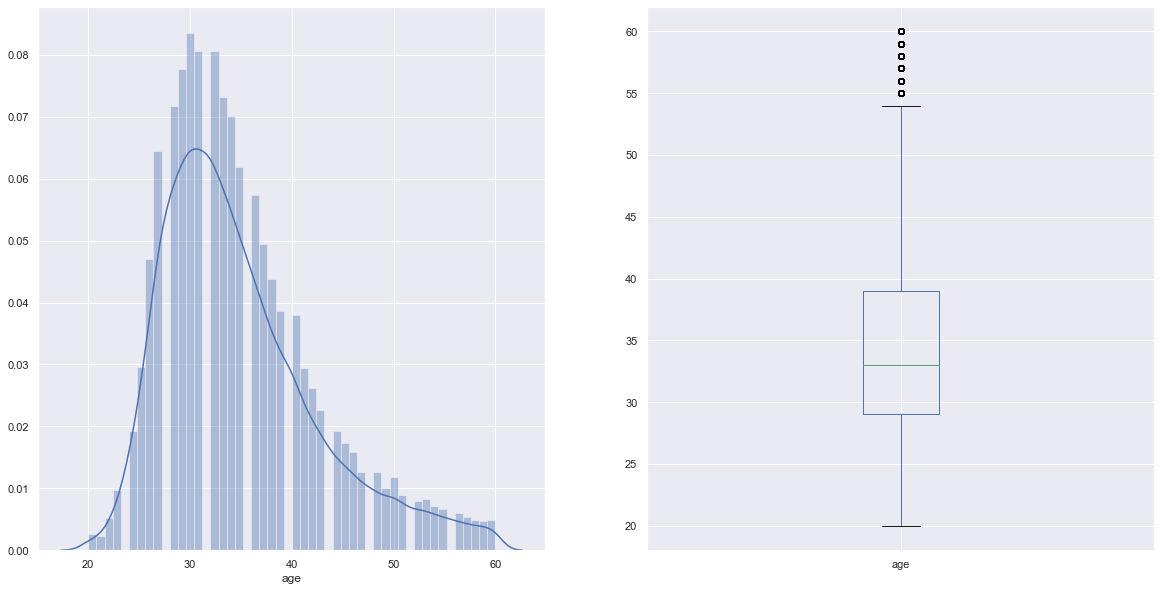

In [13]:
# let's visualize the numerical variable
plt.figure(1)
plt.subplot(121)
sns.distplot(train['age'])
plt.subplot(122)
train['age'].plot.box(figsize=(20,10))
plt.show()


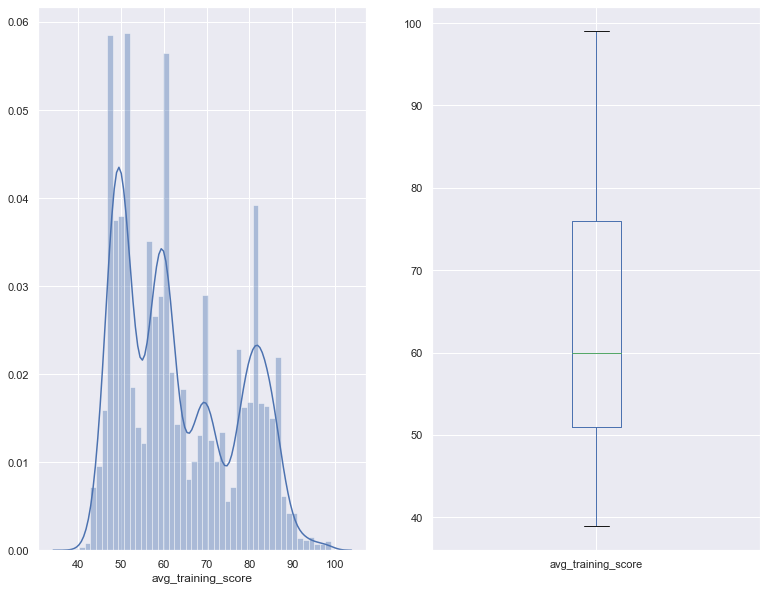

In [14]:
plt.figure(1)
plt.subplot(131)
sns.distplot(train['avg_training_score'])
plt.subplot(132)
train['avg_training_score'].plot.box(figsize=(20,10))
plt.show()

# Bivariate Analysis

## Categorical Independent vs dependent variable

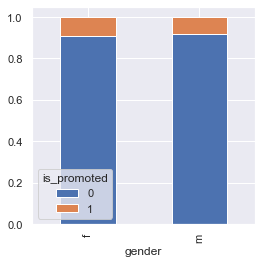

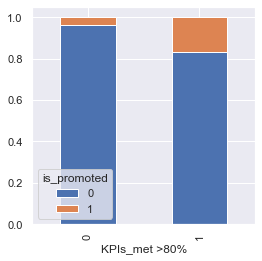

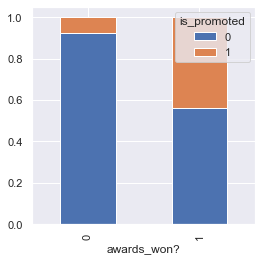

In [15]:
Gender = pd.crosstab(train['gender'],train['is_promoted'])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()
KPI_met = pd.crosstab(train['KPIs_met >80%'],train['is_promoted'])
KPI_met.div(KPI_met.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()
Award_won = pd.crosstab(train['awards_won?'],train['is_promoted'])
Award_won.div(Award_won.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

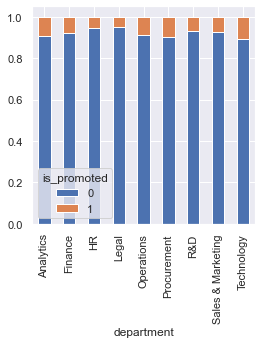

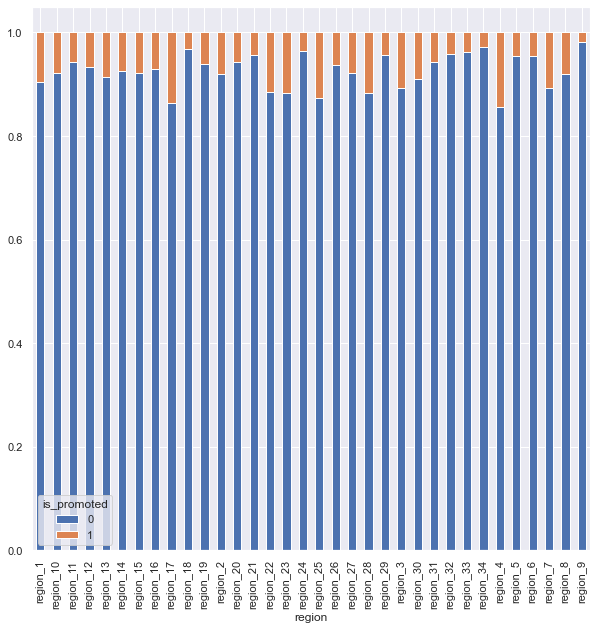

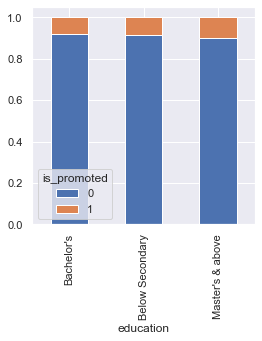

In [16]:
Department = pd.crosstab(train['department'],train['is_promoted'])
Department.div(Department.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()
Region = pd.crosstab(train['region'],train['is_promoted'])
Region.div(Region.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(10,10))
plt.show()
Education = pd.crosstab(train['education'],train['is_promoted'])
Education.div(Education.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()


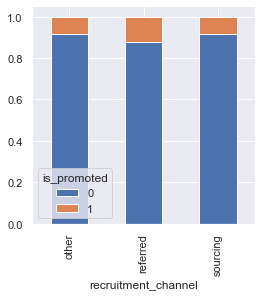

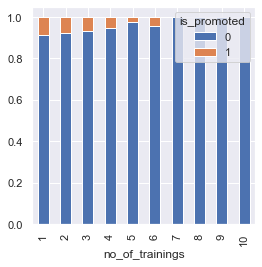

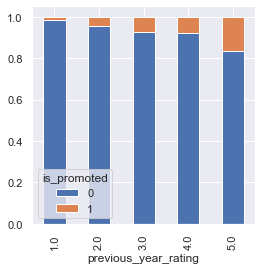

In [17]:
Recruitment_channel = pd.crosstab(train['recruitment_channel'],train['is_promoted'])
Recruitment_channel.div(Recruitment_channel.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()
No_of_trainings = pd.crosstab(train['no_of_trainings'],train['is_promoted'])
No_of_trainings.div(No_of_trainings.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()
Previous_year_rating = pd.crosstab(train['previous_year_rating'],train['is_promoted'])
Previous_year_rating.div(Previous_year_rating.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

# Numerical variable vs dependent variable

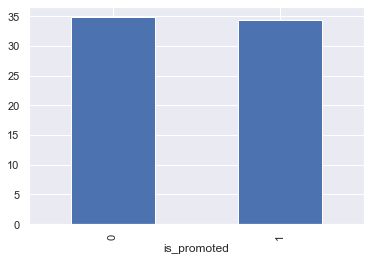

In [18]:
train.groupby('is_promoted')['age'].mean().plot.bar()

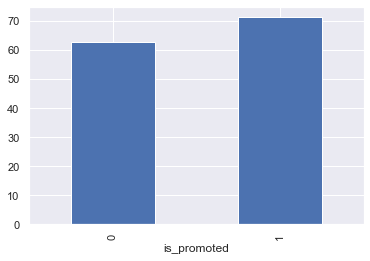

In [19]:
train.groupby('is_promoted')['avg_training_score'].mean().plot.bar()

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
lbl_encoder = LabelEncoder()

In [22]:
train['department'] = lbl_encoder.fit_transform(train['department'])
test['department'] = lbl_encoder.fit_transform(test['department'])

In [23]:
train['region'] = lbl_encoder.fit_transform(train['region'])
test['region'] = lbl_encoder.fit_transform(test['region'])
train['gender'] = lbl_encoder.fit_transform(train['gender'])
test['gender'] = lbl_encoder.fit_transform(test['gender'])
train['recruitment_channel'] = lbl_encoder.fit_transform(train['recruitment_channel'])
test['recruitment_channel'] = lbl_encoder.fit_transform(test['recruitment_channel'])

In [24]:
train['education'] = train['education'].map({'Master\'s & above':0,'Bachelor\'s':1,'Below Secondary':2})
test['education'] = test['education'].map({'Master\'s & above' :0,'Bachelor\'s':1,'Below Secondary':2})

In [25]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,7,31,0.0,0,2,1,35,5.0,8,1,0,49,0
1,65141,4,14,1.0,1,0,1,30,5.0,4,0,0,60,0
2,7513,7,10,1.0,1,2,1,34,3.0,7,0,0,50,0
3,2542,7,15,1.0,1,0,2,39,1.0,10,0,0,50,0
4,48945,8,18,1.0,1,0,1,45,3.0,2,0,0,73,0


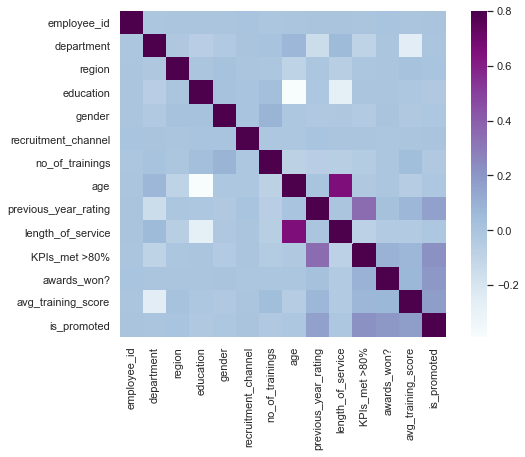

In [26]:
matrix = train.corr()
ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=.8,square=True,cmap='BuPu')

# Missing Values

In [27]:
train.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [28]:
train['education'].fillna(train['education'].mode()[0],inplace=True)
test['education'].fillna(train['education'].mode()[0],inplace=True)

In [29]:
train['education'].isna().any()

False

In [30]:
train['previous_year_rating'].value_counts()

3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: previous_year_rating, dtype: int64

In [31]:
test['previous_year_rating'].value_counts()

3.0    7921
5.0    5097
4.0    4249
1.0    2680
2.0    1731
Name: previous_year_rating, dtype: int64

In [32]:
train['previous_year_rating'] = train['previous_year_rating'].fillna(0)
test['previous_year_rating'] = test['previous_year_rating'].fillna(0)

In [33]:
train['previous_year_rating'].isnull().any()

False

In [34]:
test['previous_year_rating'].isnull().any()

False

In [35]:
train.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [36]:
train['previous_year_rating'].value_counts()

3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
0.0     4124
Name: previous_year_rating, dtype: int64

In [37]:
test.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

# Model Building

In [38]:
train = train.drop(['employee_id'],axis=1)
test = test.drop(['employee_id'],axis=1)

In [39]:
X = train.drop(['is_promoted'],axis=1)
y = train['is_promoted']

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.3)

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [43]:
model = LogisticRegression()

In [44]:
model.fit(X_train,y_train)

LogisticRegression()

In [45]:
predict_val = model.predict(X_val)

In [46]:
f1_score(y_val,predict_val)

0.13367609254498714

In [47]:
pred_test = model.predict(test)

In [48]:
pred_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [49]:
submission.head()

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0


In [50]:
output = pd.DataFrame({'employee_id': submission.employee_id,
                       'is_promoted': pred_test})
output.to_csv('submission.csv',index=False)

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
model_1 = RandomForestClassifier()

In [53]:
model_1.fit(X_train,y_train)

RandomForestClassifier()

In [54]:
pred_val_1 = model_1.predict(X_val)

In [55]:
f1_score(pred_val_1,y_val)

0.42151004888647475

In [56]:
pred_test_1 = model.predict(test)

In [57]:
output_1 = pd.DataFrame({'employee_id': submission.employee_id,
                       'is_promoted': pred_test_1})
output_1.to_csv('randomforest.csv',index=False)

In [58]:
from sklearn.model_selection import StratifiedKFold

In [59]:
kf = StratifiedKFold(n_splits=5,random_state=123,shuffle=True)

In [60]:
i=1
for train_index, test_index in kf.split(X,y):
    print('{} of kfold {}'.format(i,kf.n_splits))
    X_tr,X_val = X.loc[train_index], X.loc[test_index]
    y_tr, y_val = y.loc[train_index],y.loc[test_index]
    model_2 = LogisticRegression(random_state=123)
    model_2.fit(X_tr,y_tr)
    pred_test_2 = model_2.predict(X_val)
    score = f1_score(y_val,pred_test_2)
    print('f1 score :',score)
    i+=1
    pred_test_2 = model_2.predict(test)
    predict = model_2.predict_proba(X_val)[:,1]
    
    

1 of kfold 5
f1 score : 0.13011152416356878
2 of kfold 5
f1 score : 0.10666666666666667
3 of kfold 5
f1 score : 0.09626719056974462
4 of kfold 5
f1 score : 0.13099630996309963
5 of kfold 5
f1 score : 0.10381978452497549


In [61]:
i=1
for train_index, test_index in kf.split(X,y):
    print('{} of kfold {}'.format(i,kf.n_splits))
    X_tr,X_val = X.loc[train_index], X.loc[test_index]
    y_tr, y_val = y.loc[train_index],y.loc[test_index]
    model_3 = RandomForestClassifier()
    model_3.fit(X_tr,y_tr)
    pred_test_3 = model_3.predict(X_val)
    score = f1_score(y_val,pred_test_3)
    print('f1 score :',score)
    i+=1
    pred_test_3 = model_3.predict(test)
    predict = model_2.predict_proba(X_val)[:,1]
    

1 of kfold 5
f1 score : 0.43029814665592264
2 of kfold 5
f1 score : 0.3974255832662913
3 of kfold 5
f1 score : 0.4356120826709062
4 of kfold 5
f1 score : 0.42248995983935744
5 of kfold 5
f1 score : 0.4210526315789474


In [62]:
output_2 = pd.DataFrame({'employee_id': submission.employee_id,
                       'is_promoted': pred_test_3})
output_2.to_csv('randomforest_1.csv',index=False)

In [63]:
from sklearn.tree import DecisionTreeClassifier

In [64]:
i=1
for train_index, test_index in kf.split(X,y):
    print('{} of kfold {}'.format(i,kf.n_splits))
    X_tr,X_val = X.loc[train_index], X.loc[test_index]
    y_tr, y_val = y.loc[train_index],y.loc[test_index]
    model_4 = DecisionTreeClassifier()
    model_4.fit(X_tr,y_tr)
    pred_test_4 = model_4.predict(X_val)
    score = f1_score(y_val,pred_test_4)
    print('f1 score :',score)
    i+=1
    pred_test_4 = model_4.predict(test)
    predict = model_4.predict_proba(X_val)[:,1]

1 of kfold 5
f1 score : 0.41097256857855363
2 of kfold 5
f1 score : 0.41904761904761906
3 of kfold 5
f1 score : 0.4349553128103277
4 of kfold 5
f1 score : 0.4287200832466181
5 of kfold 5
f1 score : 0.4081218274111675


In [65]:
output_3 = pd.DataFrame({'employee_id': submission.employee_id,
                       'is_promoted': pred_test_4})
output_3.to_csv('Decisiontree.csv',index=False)

In [66]:
from xgboost import XGBClassifier

In [67]:
i=1
for train_index, test_index in kf.split(X,y):
    print('{} of kfold {}'.format(i,kf.n_splits))
    X_tr,X_val = X.loc[train_index], X.loc[test_index]
    y_tr, y_val = y.loc[train_index],y.loc[test_index]
    model_5 = XGBClassifier()
    model_5.fit(X_tr,y_tr)
    pred_test_5 = model_5.predict(X_val)
    score = f1_score(y_val,pred_test_5)
    print('f1 score :',score)
    i+=1
    pred_test_5 = model_5.predict(test)
    predict = model_5.predict_proba(X_val)[:,1]

1 of kfold 5
f1 score : 0.499616858237548
2 of kfold 5
f1 score : 0.4888203546646107
3 of kfold 5
f1 score : 0.5083459787556905
4 of kfold 5
f1 score : 0.5145482388973965
5 of kfold 5
f1 score : 0.49847094801223235


In [68]:
output_4 = pd.DataFrame({'employee_id': submission.employee_id,
                       'is_promoted': pred_test_5})
output_4.to_csv('xgboost_1.csv',index=False)

# Hyperparameter Tuning

In [69]:
from sklearn.model_selection import GridSearchCV

In [70]:
paramgrid = {'n_estimators':[50,100,150,200,250,500]}
grid_search = GridSearchCV(XGBClassifier(random_state=123),paramgrid)

In [71]:
X_train,X_cv,y_train,y_cv = train_test_split(X,y,test_size=0.3,random_state=123)

In [72]:
grid_search.fit(X_train,y_train)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=123,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameters

In [73]:
grid_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=0, num_parallel_tree=1, random_state=123,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [74]:
i=1
for train_index, test_index in kf.split(X,y):
    print('{} of kfold {}'.format(i,kf.n_splits))
    X_tr,X_val = X.loc[train_index], X.loc[test_index]
    y_tr, y_val = y.loc[train_index],y.loc[test_index]
    model_6 = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=50, n_jobs=0, num_parallel_tree=1, random_state=123,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
    model_6.fit(X_tr,y_tr)
    pred_test_6 = model_6.predict(X_val)
    score = f1_score(y_val,pred_test_6)
    print('f1 score :',score)
    i+=1
    pred_test_6 = model_6.predict(test)
    predict = model_6.predict_proba(X_val)[:,1]

1 of kfold 5
f1 score : 0.4996072270227808
2 of kfold 5
f1 score : 0.4862745098039216
3 of kfold 5
f1 score : 0.504266873545384
4 of kfold 5
f1 score : 0.5054945054945056
5 of kfold 5
f1 score : 0.5058548009367682


In [75]:
output_5 = pd.DataFrame({'employee_id': submission.employee_id,
                       'is_promoted': pred_test_6})
output_5.to_csv('xgboost_2.csv',index=False)

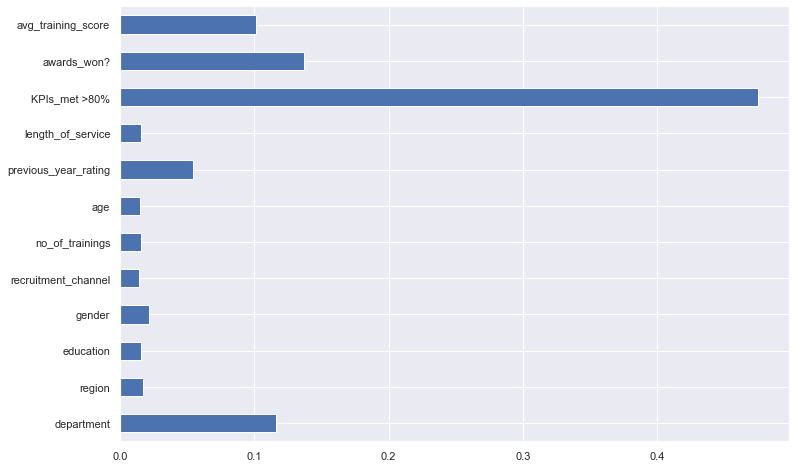

In [76]:
importances = pd.Series(model_6.feature_importances_, index=X.columns)
importances.plot(kind='barh', figsize=(12,8))

In [77]:
X_1 =  train.drop(['region','education','recruitment_channel','no_of_trainings','age','length_of_service',
                'is_promoted','gender'],axis=1)

In [78]:
test = test.drop(['region','education','gender','recruitment_channel','no_of_trainings','age','length_of_service'],axis=1)

In [79]:
i=1
for train_index, test_index in kf.split(X_1,y):
    print('{} of kfold {}'.format(i,kf.n_splits))
    X_tr,X_val = X_1.loc[train_index], X_1.loc[test_index]
    y_tr, y_val = y.loc[train_index],y.loc[test_index]
    model_6 = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=50, n_jobs=0, num_parallel_tree=1, random_state=123,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
    model_6.fit(X_tr,y_tr)
    pred_test_6 = model_6.predict(X_val)
    score = f1_score(y_val,pred_test_6)
    print('f1 score :',score)
    i+=1
    pred_test_6 = model_6.predict(test)
    predict = model_6.predict_proba(X_val)[:,1]

1 of kfold 5
f1 score : 0.5098347757671126
2 of kfold 5
f1 score : 0.4952681388012618
3 of kfold 5
f1 score : 0.5098039215686275
4 of kfold 5
f1 score : 0.5090622537431049
5 of kfold 5
f1 score : 0.5023400936037442


In [80]:
output_5 = pd.DataFrame({'employee_id': submission.employee_id,
                       'is_promoted': pred_test_6})
output_5.to_csv('xgboost_3.csv',index=False)